#importing required library

In [1]:
import numpy as np # linear algebra

import pandas as pd # data processing CSV file I/O

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder #Encode target labels with value

from imblearn.over_sampling import SMOTE #Synthetic Minority Oversampling Technique.

from sklearn.preprocessing import MinMaxScaler

In [2]:
#loading the .CSV dataset

data = pd.read_csv("aps_failure_test_set.csv") 

In [3]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


# replacing the 'na' values to 'NAN' using numpy

In [4]:
 data.replace(to_replace='na',value=np.nan,inplace=True)

In [5]:
#encode labels to 0 and 1
 
le = LabelEncoder() #importing label encoder

data['class'] = le.fit_transform(data['class']) #picking the values of column 'class'

df = data.copy()

df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,0,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,0,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,0,59816,NaN,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,0,1814,NaN,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


Text(0.5, 1.0, 'ratio of positive and negative values')

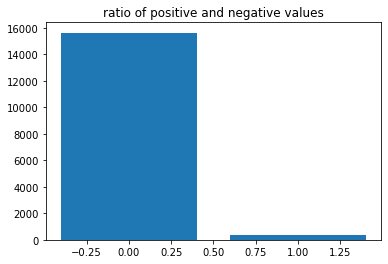

In [6]:
plt.bar(list(df['class'].value_counts().keys()), df['class'].value_counts()) 

plt.title('ratio of positive and negative values')

## finding out the number of missing values in each column

In [7]:
df.isna().sum().sort_values(ascending=False)[:50]

br_000    13129
bq_000    12981
bp_000    12721
bo_000    12376
cr_000    12363
ab_000    12363
bn_000    11713
bm_000    10546
bl_000     7226
bk_000     6094
cf_000     3981
co_000     3981
cg_000     3981
ch_000     3981
ad_000     3981
cx_000     3718
ct_000     3718
cv_000     3718
cu_000     3718
cy_000     3718
cz_000     3718
da_000     3718
db_000     3718
dc_000     3718
ec_00      2644
cm_000     2578
cl_000     2459
ed_000     2459
ca_000     1206
ak_000     1198
dh_000     1094
dg_000     1094
df_000     1094
di_000     1094
dl_000     1094
dj_000     1094
dm_000     1094
eb_000     1094
dk_000     1094
ac_000      926
bx_000      866
cc_000      865
ar_000      764
de_000      764
bd_000      764
bc_000      764
dy_000      764
dx_000      764
dv_000      764
du_000      764
dtype: int64

In [8]:
data = df.fillna(0)

In [9]:
data.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [10]:
data['class'].unique()

array([0, 1])

In [11]:
data['class'].value_counts() #neg =0 , pos =1

0    15625
1      375
Name: class, dtype: int64

In [12]:
# oversampling

y = data['class']

X = data.drop('class',axis=1)

oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

In [13]:
y.value_counts()

1    15625
0    15625
Name: class, dtype: int64

In [14]:
#scale

scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = list(X.columns))

## splitting the data into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state=42)

# Fitting Naive Bayes to the Training set

In [16]:
from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()

In [17]:
# Train the model using the testing sets

model.fit(X_train,y_train)

GaussianNB()

In [18]:
#accuracy_score after fitting naive bayes to the training set

from sklearn.metrics import accuracy_score 

#Predict the response for test dataset

y_pred = model.predict(X_test)

In [19]:
y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [20]:
Y_pred = y_pred.reshape(-1)

In [21]:
from sklearn.metrics import classification_report #defining the final classification report 

print(classification_report(Y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      8155
           1       0.93      0.96      0.94      7470

    accuracy                           0.95     15625
   macro avg       0.95      0.95      0.95     15625
weighted avg       0.95      0.95      0.95     15625



## Logistic Regression Model Fitting

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression() 

In [25]:
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(X_test) #Predict the response for test dataset

In [27]:
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [28]:
Y_pred = y_pred.reshape(-1)

In [29]:
from sklearn.metrics import classification_report #defining the final classification report 

print(classification_report(Y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8039
           1       0.95      0.97      0.96      7586

    accuracy                           0.96     15625
   macro avg       0.96      0.96      0.96     15625
weighted avg       0.96      0.96      0.96     15625

